In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_csv('sentimentdataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [3]:
# drop column Unnamed: 0.1
df.drop(columns='Unnamed: 0.1',inplace=True)

In [4]:
# Rename column Unnamed: 0 to id
df.rename(columns={'Unnamed: 0':'Id'},inplace=True)

In [5]:
df.isnull().sum()

Id           0
Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Id         732 non-null    int64         
 1   Text       732 non-null    object        
 2   Sentiment  732 non-null    object        
 3   Timestamp  732 non-null    datetime64[ns]
 4   User       732 non-null    object        
 5   Platform   732 non-null    object        
 6   Hashtags   732 non-null    object        
 7   Retweets   732 non-null    float64       
 8   Likes      732 non-null    float64       
 9   Country    732 non-null    object        
 10  Year       732 non-null    int32         
 11  Month      732 non-null    int32         
 12  Day        732 non-null    int32         
 13  Hour       732 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(6)
memory usage: 71.6+ KB


In [9]:
df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()

In [10]:
df.head()

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [11]:
object_columns = df.select_dtypes(include=['object']).columns 

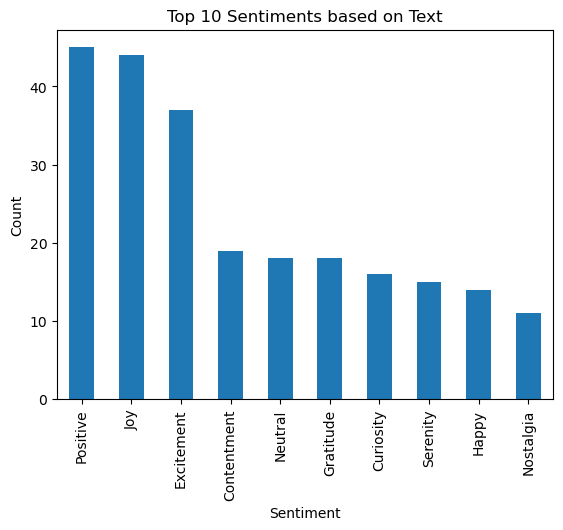

In [12]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

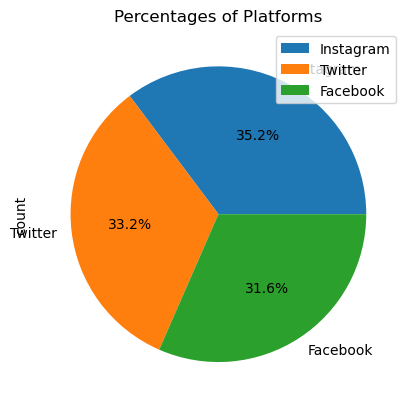

In [13]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

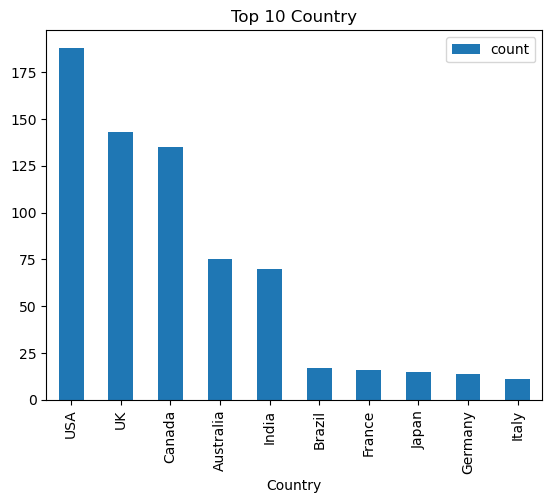

In [14]:
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Country')
plt.legend()
plt.show()

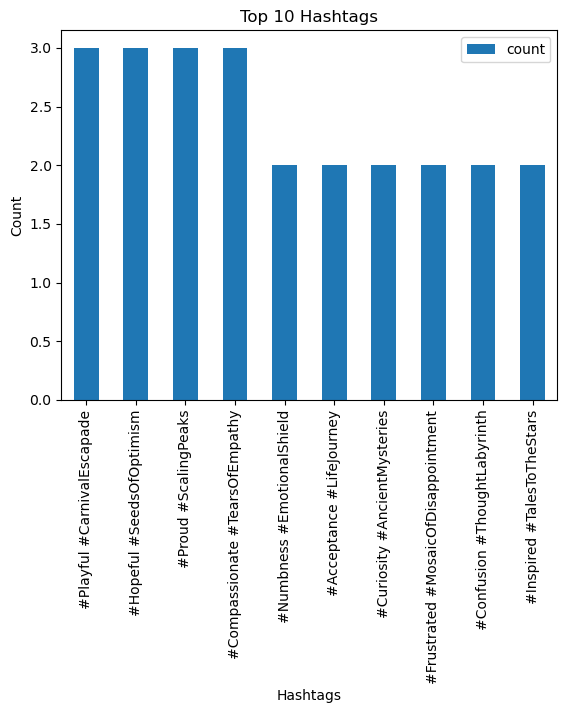

In [15]:
df['Hashtags'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.legend()
plt.show()

In [16]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
df.head()

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [19]:
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english')) | ENGLISH_STOP_WORDS
    tokens = [word for word in tokens if word.lower() not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    processed_text = ' '.join(tokens)
    
    return processed_text

In [20]:
df['clean_text'] = df['Text'].apply(clean_text)
print(df[['Text', 'clean_text']].head())

                                          Text                    clean_text
0        Enjoying a beautiful day at the park!         enjoy beauti day park
1           Traffic was terrible this morning.          traffic terribl morn
2          Just finished an amazing workout! 💪           finish amaz workout
3  Excited about the upcoming weekend getaway!   excit upcom weekend getaway
4  Trying out a new recipe for dinner tonight.  tri new recip dinner tonight


In [21]:
df['Sentiment'].unique()

array(['Positive', 'Negative', 'Neutral', 'Anger', 'Fear', 'Sadness',
       'Disgust', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment',
       'Admiration', 'Affection', 'Awe', 'Disappointed', 'Surprise',
       'Acceptance', 'Adoration', 'Anticipation', 'Bitter', 'Calmness',
       'Confusion', 'Excitement', 'Kind', 'Pride', 'Shame', 'Elation',
       'Euphoria', 'Contentment', 'Serenity', 'Gratitude', 'Hope',
       'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm',
       'Fulfillment', 'Reverence', 'Despair', 'Grief', 'Loneliness',
       'Jealousy', 'Resentment', 'Frustration', 'Boredom', 'Anxiety',
       'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Curiosity',
       'Indifference', 'Numbness', 'Melancholy', 'Nostalgia',
       'Ambivalence', 'Determination', 'Zest', 'Hopeful', 'Proud',
       'Grateful', 'Empathetic', 'Compassionate', 'Playful',
       'Free-spirited', 'Inspired', 'Confident', 'Bitterness', 'Yearning',
       'Fearful', 'Apprehensiv

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
dtm_boolean = vectorizer.fit_transform(df['clean_text'])
dtm_boolean_df = pd.DataFrame(dtm_boolean.toarray(), columns=vectorizer.get_feature_names_out())

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Sentiment'], test_size=0.2, random_state=42)

In [23]:
# Feature extraction
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()


In [24]:
# Model training and evaluation - Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.14285714285714285
                      precision    recall  f1-score   support

          Acceptance       0.00      0.00      0.00         2
          Admiration       0.00      0.00      0.00         2
           Affection       0.00      0.00      0.00         1
         Ambivalence       0.00      0.00      0.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         1
             Arousal       0.00      0.00      0.00         3
                 Awe       0.00      0.00      0.00         2
                 Bad       0.00      0.00      0.00         1
            Betrayal       0.00      0.00      0.00         3
              Bitter       0.00      0.00      0.00         1
          Bitterness       0.00      0.00      0.00         1
         Bittersweet       0.00      0.00      0.00         1
             Boredom       0.00      0.00      0.00         1
            Calmness       

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [27]:
classifier_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  
    ('classifier', SVC(kernel='linear'))
])

In [29]:
classifier_pipeline.fit(X_train, y_train)

predictions = classifier_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
classification_report_str = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.31
Classification Report:
                       precision    recall  f1-score   support

          Acceptance       1.00      1.00      1.00         2
          Admiration       0.00      0.00      0.00         2
           Affection       0.00      0.00      0.00         1
         Ambivalence       1.00      1.00      1.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         1
             Arousal       0.00      0.00      0.00         3
                 Awe       0.00      0.00      0.00         2
                 Bad       0.00      0.00      0.00         1
            Betrayal       0.00      0.00      0.00         3
              Bitter       0.00      0.00      0.00         1
          Bitterness       1.00      1.00      1.00         1
         Bittersweet       0.00      0.00      0.00         1
             Boredom       0.00      0.00      0.00         1
            Calmness       0.0

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\m

In [31]:
classifier_pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # You can adjust max_features as needed
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # You can adjust parameters
])

In [33]:
classifier_pipeline_rf.fit(X_train, y_train)

predictions = classifier_pipeline_rf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
classification_report_str = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.49
Classification Report:
                       precision    recall  f1-score   support

          Acceptance       1.00      1.00      1.00         2
      Accomplishment       0.00      0.00      0.00         0
          Admiration       1.00      1.00      1.00         2
           Affection       0.00      0.00      0.00         1
         Ambivalence       1.00      1.00      1.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       1.00      1.00      1.00         1
             Arousal       1.00      0.33      0.50         3
       ArtisticBurst       0.00      0.00      0.00         0
                 Awe       1.00      1.00      1.00         2
                 Bad       1.00      1.00      1.00         1
            Betrayal       0.50      0.33      0.40         3
              Bitter       1.00      1.00      1.00         1
          Bitterness       1.00      1.00      1.00         1
         Bittersweet       0.0

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\m

In [35]:
classifier_pipeline_svc = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Adjust max_features as needed
    ('classifier', SVC(kernel='linear', random_state=42))  # Adjust parameters as needed
])

In [36]:
classifier_pipeline_svc.fit(X_train, y_train)

predictions = classifier_pipeline_svc.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
classification_report_str = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.31
Classification Report:
                       precision    recall  f1-score   support

          Acceptance       1.00      1.00      1.00         2
          Admiration       0.00      0.00      0.00         2
           Affection       0.00      0.00      0.00         1
         Ambivalence       1.00      1.00      1.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         1
             Arousal       0.00      0.00      0.00         3
                 Awe       0.00      0.00      0.00         2
                 Bad       0.00      0.00      0.00         1
            Betrayal       0.00      0.00      0.00         3
              Bitter       0.00      0.00      0.00         1
          Bitterness       1.00      1.00      1.00         1
         Bittersweet       0.00      0.00      0.00         1
             Boredom       0.00      0.00      0.00         1
            Calmness       0.0

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\m